## Convolutions and Blurring
## Goals

Here we will Learn how to:
- Blur images with various low pass filters
- Apply custom-made filters to images (2D convolution)


## 2D Convolution ( Image Filtering )

As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:

$$K =  {\frac{1}{25}} \begin{bmatrix} 1 & 1 & 1 & 1 & 1  \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$

Filtering with the above kernel results in the following being performed: for each pixel, a 5x5 window is centered on this pixel, all pixels falling within this window are summed up, and the result is then divided by 25. This equates to computing the average of the pixel values inside that window. This operation is performed for all the pixels in the image to produce the output filtered image. Try this code and check the result:

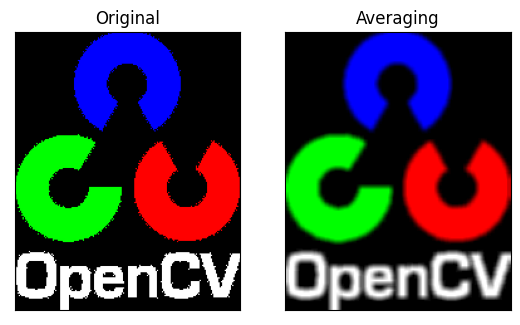

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/opencv_logo.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Blurring (Image Smoothing)
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. (Well, there are blurring techniques which do not blur edges). OpenCV provides mainly four types of blurring techniques.

1. Averaging
This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter().  We should specify the width and height of kernel. A 3x3 normalized box filter would look like this:

$$ K =  \frac{1}{9} \begin{bmatrix} 1 & 1 & 1  \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$


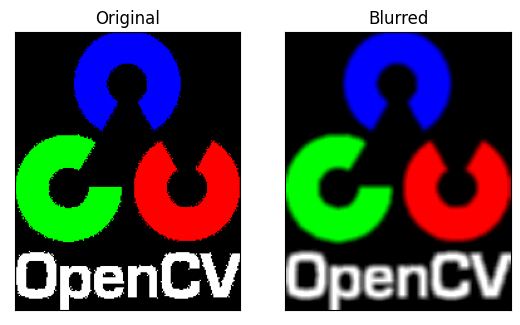

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/opencv_logo.png')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2. Gaussian Filtering
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().

The above code can be modified for Gaussian blurring:

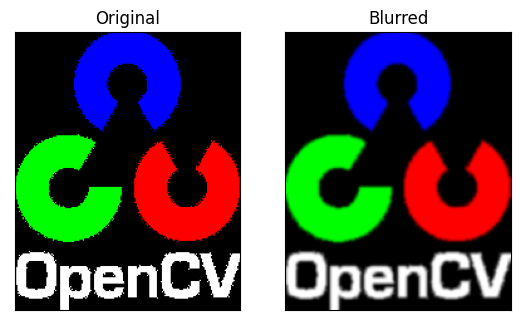

In [9]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
import cv2
import numpy as np

image = cv2.imread('images/elephant.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey(0)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
cv2.imshow('3x3 Kernel Blurring', blurred)
cv2.waitKey(0)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
cv2.imshow('7x7 Kernel Blurring', blurred2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Other commonly used blurring methods in OpenCV
### Median Blurring

Here, the function cv.medianBlur() takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blurring. Check the result:

In [28]:
import cv2
import numpy as np
import cv2
import numpy as np
#This library provides a set of useful function to add noise to images
from skimage.util import random_noise

# Load the image
img = cv2.imread("images/opencv_logo.PNG")
#------------
#ADDING NOISE
#------------
# Add salt-and-pepper noise to the image.
# For details refer to https://scikit-image.org/docs/dev/api/skimage.util.html
#skimage.util.random_noise
noise_img = random_noise(img, mode='s&p',amount=0.5)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')
#------------
#------------
median = cv2.medianBlur(noise_img,5)

# Display the noise image
cv2.imshow('Original',noise_img)
cv2.imshow('Median',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Bilateral filter

In Gaussian smoothing we take a weighted average of pixel values in the neighborhood. The weights are inversely proportional to 
the distance from the center of the neighborhood. Besides these spatial weights, the bilateral filter adds a tonal weight such 
that pixel values that are close to the pixel value in the center are weighted more than pixel values that are more different.
This tonal weighting makes that the bilateral filter is capable of preserving edges (large differences in tonal value) while 
smoothing in the more flat regions (small tonal differences).

In [47]:
import cv2
import numpy as np
#This library provides a set of useful function to add noise to images
from skimage.util import random_noise

#------------
#ADDING NOISE
#------------
# Load the image
img = cv2.imread("images/opencv_logo.PNG")
# Add gaussian noise to the image.
gaussian_img = random_noise(img, mode="gaussian",var = 0.02)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
gaussian_img = np.array(255*gaussian_img, dtype = 'uint8')
#------------
#input 1 window size; input 2 : sigma distance; input 3 : sigma intensity 
#------------
bilateral = cv2.bilateralFilter(gaussian_img,9,75,75)
# Display the noise image
cv2.imshow('Original',gaussian_img)
cv2.imshow('bilateral',bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

## TO DO : Here are some examples of images corrupted with different type of noises
Please try the filters with them.

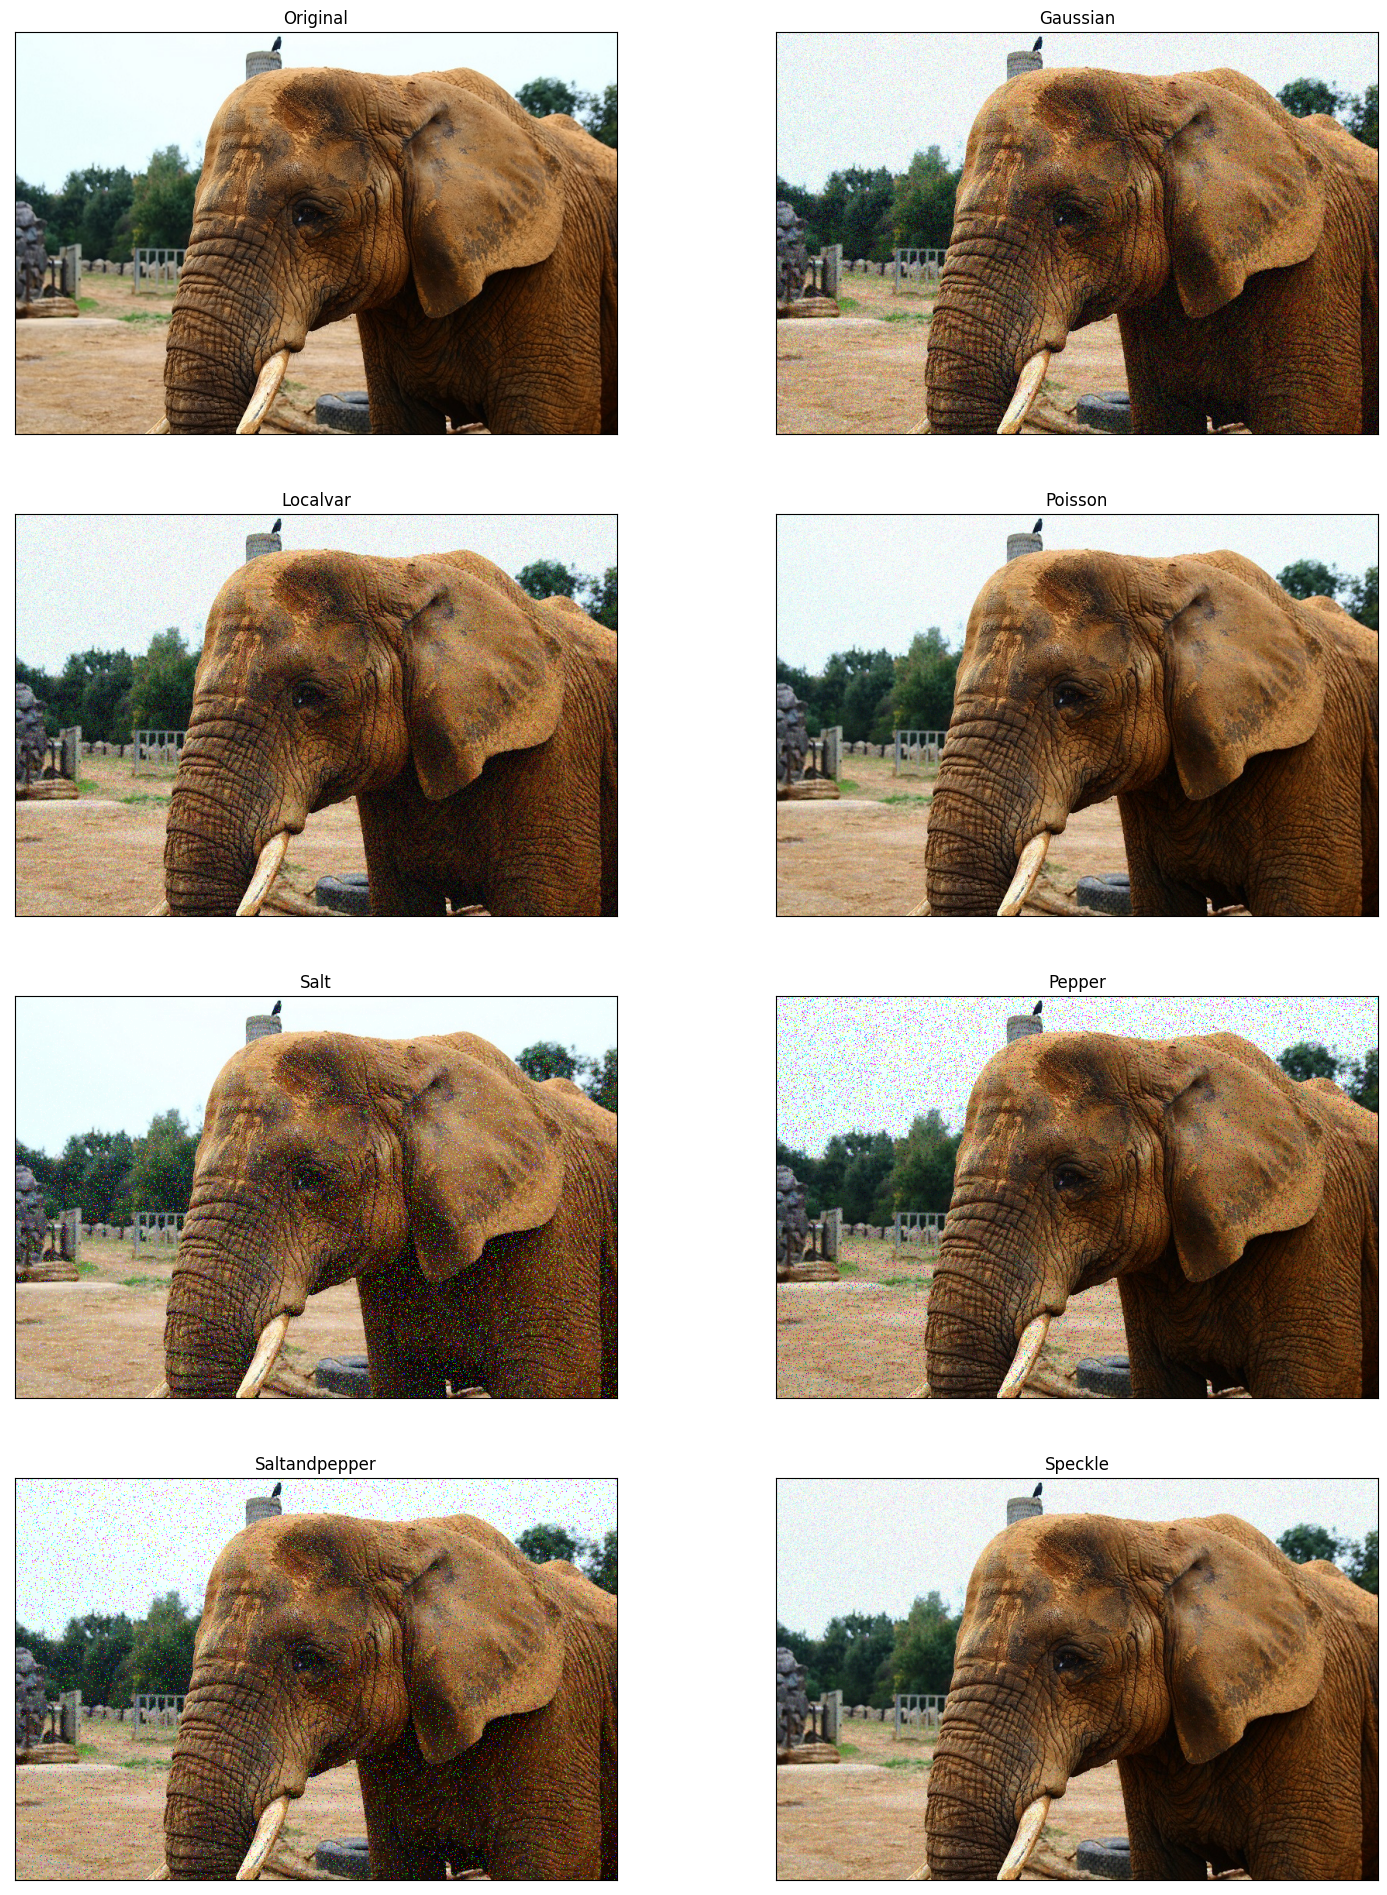

In [74]:
import cv2
import numpy as np
#This library provides a set of useful function to add noise to images
from skimage.util import random_noise
import matplotlib.pyplot as plt
# Load the image
#img = cv2.imread("images/opencv_logo.PNG")
img = cv2.imread("images/elephant.jpg")
#img = skimage.io.imread("images/elephant.jpg")/255
#Be careful BGR and not RGB with cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gaussian = skimage.util.random_noise(img, mode="gaussian")
gaussian = np.array(255*gaussian, dtype = 'uint8')

localvar = skimage.util.random_noise(img, mode="localvar")
localvar = np.array(255*localvar, dtype = 'uint8')

poisson = skimage.util.random_noise(img, mode="poisson")
poisson = np.array(255*poisson, dtype = 'uint8')

salt = skimage.util.random_noise(img, mode="salt")
salt = np.array(255*salt, dtype = 'uint8')

pepper = skimage.util.random_noise(img, mode="pepper")
pepper = np.array(255*pepper, dtype = 'uint8')

saltandpepper =skimage.util.random_noise(img, mode="s&p")
saltandpepper = np.array(255*saltandpepper, dtype = 'uint8')

speckle = skimage.util.random_noise(img, mode="speckle")
speckle = np.array(255*speckle, dtype = 'uint8')


plt.figure(figsize=(18,24))

plt.subplot(4,2,1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(4,2,2),plt.imshow(gaussian),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])

plt.subplot(4,2,3),plt.imshow(localvar),plt.title('Localvar')
plt.xticks([]), plt.yticks([])

plt.subplot(4,2,4),plt.imshow(poisson),plt.title('Poisson')
plt.xticks([]), plt.yticks([])

plt.subplot(4,2,5),plt.imshow(salt),plt.title('Salt')
plt.xticks([]), plt.yticks([])

plt.subplot(4,2,6),plt.imshow(pepper),plt.title('Pepper')
plt.xticks([]), plt.yticks([])

plt.subplot(4,2,7),plt.imshow(saltandpepper),plt.title('Saltandpepper')
plt.xticks([]), plt.yticks([])

plt.subplot(4,2,8),plt.imshow(speckle),plt.title('Speckle')
plt.xticks([]), plt.yticks([])

plt.show()